In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import plotly.graph_objects as go 

In [4]:
data_by_city = pd.DataFrame(np.array([['Boston', 'Chicago', 'Los Angeles', 'New York', 'San Francisco', 'Washington'], 
                                      [3468, 3719, 22453, 32349, 6434, 5688], 
                                      [42.339665, 41.908244,34.056477,40.730170, 37.766864, 38.912685],
                                      [-71.084127,-87.664402,-118.333835,-73.954882,-122.431230,-77.020166]]))
#                    columns=['city', 'bnb', 'lati', 'longi'])

In [6]:
data_by_city = data_by_city.T

In [11]:
data_by_city

,0,1,2,3
0,Boston,3468,42.339665,-71.084127
1,Chicago,3719,41.908244,-87.664402
2,Los Angeles,22453,34.056477,-118.333835
3,New York,32349,40.73017,-73.954882
4,San Francisco,6434,37.766864,-122.43123
5,Washington,5688,38.912685,-77.020166


In [20]:
data_by_city = data_by_city.set_axis(['city', 'bnb', 'latitude', 'longitude'],axis=1)

In [19]:
data_by_city.columns

RangeIndex(start=0, stop=4, step=1)

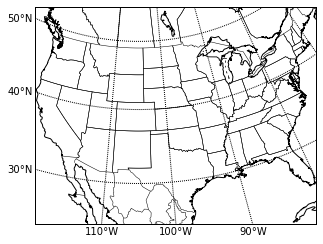

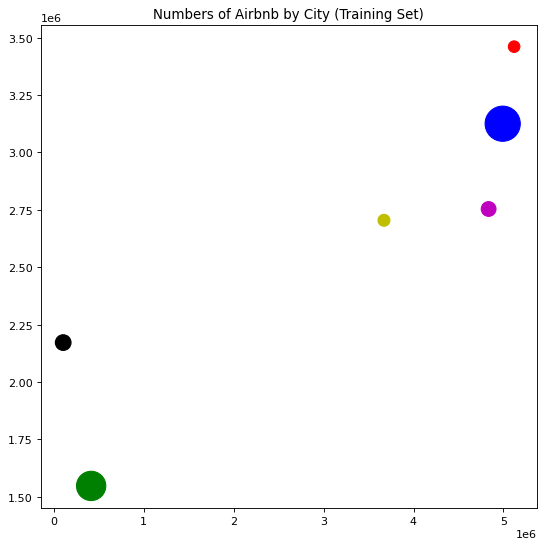

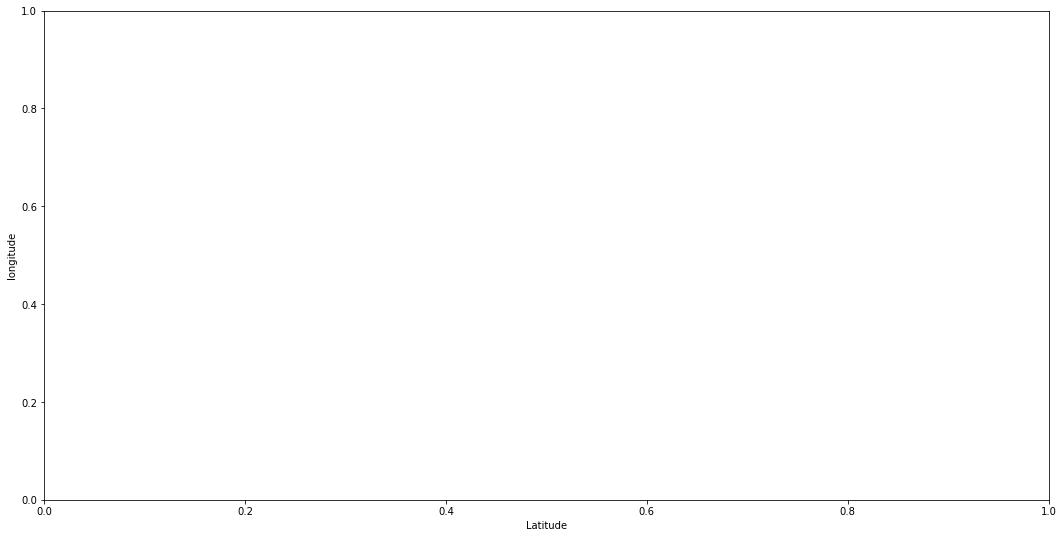

<Figure size 432x288 with 0 Axes>

In [48]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from matplotlib import pyplot as plt


map = Basemap(projection='stere',lat_0=90,lon_0=-105,\
            llcrnrlat=23.41 ,urcrnrlat=45.44,\
            llcrnrlon=-118.67,urcrnrlon=-64.52,\
            rsphere=6371200.,resolution='l',area_thresh=10000)


map.drawmapboundary()   
#map.fillcontinents()   
map.drawstates()        
map.drawcoastlines()    
map.drawcountries()     
# map.drawcounties()      

# parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) 

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 绘制经线


## 原始数据有3228组数据，我只选择了180个城市的数据
lat = np.array(data_by_city["latitude"])                        # 获取维度之维度值
lon = np.array(data_by_city["longitude"])                        # 获取经度值
pop = np.array(data_by_city["bnb"],dtype=float)    # 获取人口数，转化为numpy浮点型

size=(pop/np.max(pop))*1000     # 绘制散点图时图形的大小，如果之前pop不转换为浮点型会没有大小不一的效果
x,y = map(lon,lat)

# plt.text(x, y, 'Lagos',fontsize=12,fontweight='bold',
#                     ha='left',va='bottom',color='k')
# 
# 
# x, y = map(lon[0], lat[0])
# 
# plt.text(x, y, 'Barcelona',fontsize=12,fontweight='bold',
#                     ha='left',va='center',color='k',
#                     bbox=dict(facecolor='b', alpha=0.2))
#                     

# plt.scatter(x,y,s=size,cmap=cm.hsv,edgecolors=None,facecolors='c')


plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x,y,s=size, cmap=cm.hsv, c=['r','y','g','b','k','m']) # 使用matplotlib的散点图绘制函数
#map.scatter(x,y,s=size)     # 也可以使用Basemap的methord本身的scatter

plt.title('Numbers of Airbnb by City (Training Set)')
plt.figure(figsize=(18,9))
plt.xlabel('Latitude')
plt.ylabel('longitude')
# plt.legend(data_by_city.city)
plt.show()
plt.savefig('/Users/guanlxy/Documents/github/ids-705-final-project/reports/figures/eda0.png')

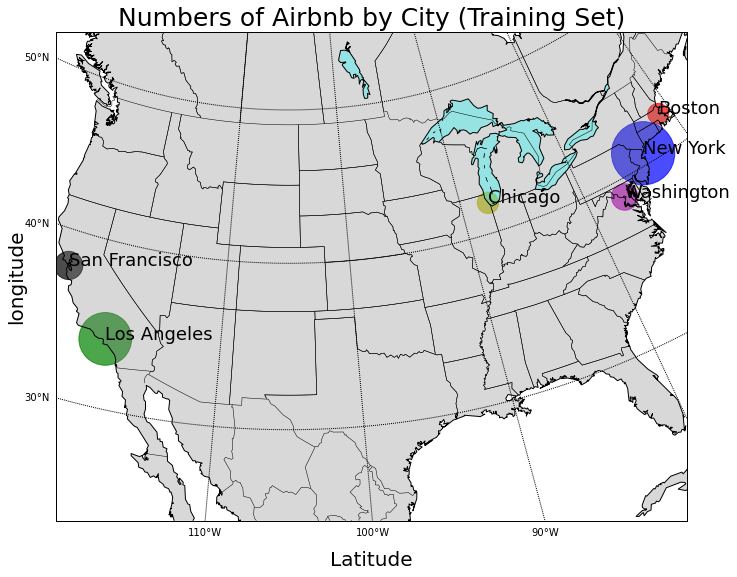

<Figure size 432x288 with 0 Axes>

In [153]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# cmap1 = LinearSegmentedColormap.from_list("my_colormap", ((0, 0, 0), (1, 1, 1)), N=6, gamma=1.0)

plt.figure(figsize=(19,9))
map = Basemap(projection='stere',lat_0=90,lon_0=-105,\
            llcrnrlat=23.41 ,urcrnrlat=45.44,\
            llcrnrlon=-118.67,urcrnrlon=-64.52,\
            rsphere=6371200.,resolution='l',area_thresh=10000)


map.drawmapboundary()   
map.fillcontinents(color='gray',lake_color='aqua', alpha=0.3)   
map.drawstates()        
map.drawcoastlines()    
map.drawcountries()     
# map.drawcounties()  
map.shadedrelief()    

# parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) 

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 绘制经线


## 原始数据有3228组数据，我只选择了180个城市的数据
lat = np.array(data_by_city["latitude"])                        # 获取维度之维度值
lon = np.array(data_by_city["longitude"])                        # 获取经度值
pop = np.array(data_by_city["bnb"],dtype=float)    # 获取人口数，转化为numpy浮点型

size=(pop/np.max(pop))*4000     # 绘制散点图时图形的大小，如果之前pop不转换为浮点型会没有大小不一的效果
x,y = map(lon,lat)

# plt.text(x, y, 'Lagos',fontsize=12,fontweight='bold',
#                     ha='left',va='bottom',color='k')
# 
# 
# x, y = map(lon[0], lat[0])
# 
# plt.text(x, y, 'Barcelona',fontsize=12,fontweight='bold',
#                     ha='left',va='center',color='k',
#                     bbox=dict(facecolor='b', alpha=0.2))
#                     

# plt.scatter(x,y,s=size,cmap=cm.hsv,edgecolors=None,facecolors='c')

 
plt.scatter(x,y,s=size, cmap=cm.hsv, c=['r','y','g','b','k','m'], alpha=0.7,edgecolors=None,facecolors='c') # 使用matplotlib的散点图绘制函数
# map.scatter(x,y,s=size, cmap=cm.hsv, c=['r','y','g','b','k','m'], alpha=0.7,edgecolors=None,facecolors='c') # 使用matplotlib的散点图绘制函数   # 也可以使用Basemap的methord本身的scatter

plt.title('Numbers of Airbnb by City (Training Set)', fontsize=25)
for i, txt in enumerate(data_by_city.city):
    plt.annotate(txt, (x[i], y[i]),fontsize=18)
plt.xlabel('Latitude',labelpad=30,fontsize=20)
plt.ylabel('longitude',labelpad=30,fontsize=20)
# plt.legend(data_by_city.city)
# plt.legend()
plt.show()
plt.savefig('/Users/guanlxy/Documents/github/ids-705-final-project/reports/figures/eda2.png')

In [79]:
#load data
us_train = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/us-train.csv')
us_val = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/us-val.csv')
us_test = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/us-test.csv')

london_test = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/london-test.csv')
madrid_test = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/madrid-test.csv')
paris_test = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/paris-test.csv')

In [80]:
us = pd.concat([us_train, us_val, us_test]).reset_index(drop=True)

In [126]:
us_col = us.columns
us_col

Index(['log_price', 'accommodates', 'bathrooms', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'thumbnail_url',
       ...
       'x0_Tipi', 'x0_Townhouse', 'x0_Train', 'x0_Treehouse',
       'x0_Vacation home', 'x0_Villa', 'x0_Yurt', 'x1_Entire home/apt',
       'x1_Private room', 'x1_Shared room'],
      dtype='object', length=105)

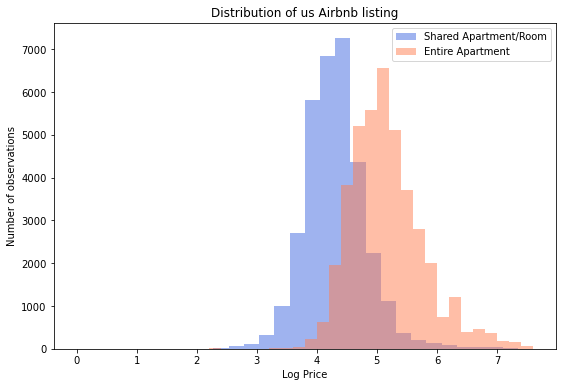

<Figure size 432x288 with 0 Axes>

In [152]:
plt.figure(figsize=(9,6))
plt.hist(us[us['x1_Entire home/apt']==0].log_price, bins=30, label='Shared Apartment/Room', color='royalblue', alpha = 0.5)
plt.hist(us[us['x1_Entire home/apt']==1].log_price, bins=30, label='Entire Apartment', color='coral',alpha = 0.5)
# plt.hist(np.exp(y_adjusted), bins=30, label='Madrid Predictions Adjusted', color='blue',alpha = 0.5)
# plt.hist(y, bins=30, label='Training Data USA', color='blue', alpha = 0.5)
plt.title('Distribution of us Airbnb listing')
plt.ylabel('Number of observations')
plt.xlabel('Log Price')
plt.legend()
plt.show()
plt.savefig('/Users/guanlxy/Documents/github/ids-705-final-project/reports/figures/eda2.png')

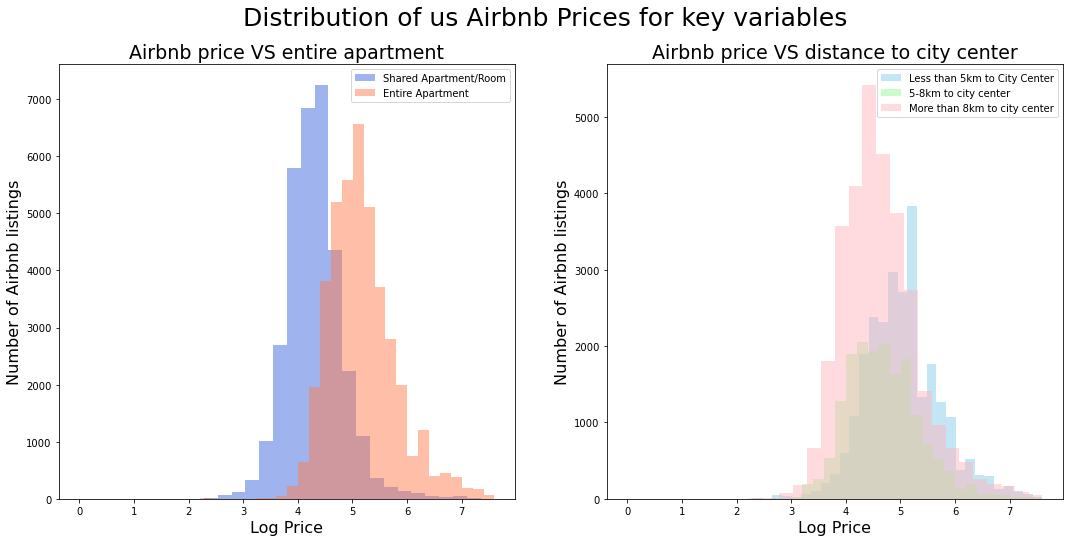

<Figure size 432x288 with 0 Axes>

In [162]:
plt.figure(figsize=(18,8))
plt.suptitle('Distribution of us Airbnb Prices for key variables',fontsize=25)

plt.subplot(1,2,1)
plt.hist(us[us['x1_Entire home/apt']==0].log_price, bins=30, label='Shared Apartment/Room', color='royalblue', alpha = 0.5)
plt.hist(us[us['x1_Entire home/apt']==1].log_price, bins=30, label='Entire Apartment', color='coral',alpha = 0.5)
# plt.hist(np.exp(y_adjusted), bins=30, label='Madrid Predictions Adjusted', color='blue',alpha = 0.5)
# plt.hist(y, bins=30, label='Training Data USA', color='blue', alpha = 0.5)
plt.title('Airbnb price VS entire apartment',fontsize=19)
plt.ylabel('Number of Airbnb listings',fontsize=16)
plt.xlabel('Log Price',fontsize=16)
plt.legend()


plt.subplot(1,2,2)
plt.hist(us1.log_price, bins=30, label='Less than 5km to City Center', color='skyblue', alpha = 0.5)
plt.hist(us2[us2['cc_dist']<8].log_price, bins=30, label='5-8km to city center', color='palegreen',alpha = 0.5)
plt.hist(us2[us2['cc_dist']>=8].log_price, bins=30, label='More than 8km to city center', color='lightpink',alpha = 0.5)
# plt.hist(y, bins=30, label='Training Data USA', color='blue', alpha = 0.5)
plt.title('Airbnb price VS distance to city center',fontsize=19)
plt.ylabel('Number of Airbnb listings',fontsize=16)
plt.xlabel('Log Price',fontsize=16)
plt.legend()
plt.show()
plt.savefig('/Users/guanlxy/Documents/github/ids-705-final-project/reports/figures/eda1.png')

In [108]:
us1 = us[us['cc_dist']<5]
us2 = us[us['cc_dist']>=5]

In [109]:
us2.shape

(48101, 105)

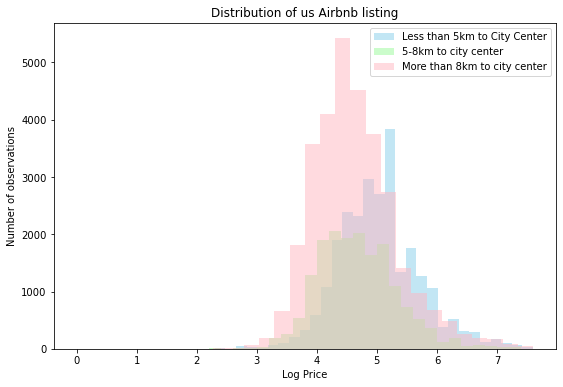

In [115]:
plt.figure(figsize=(9,6))
plt.hist(us1.log_price, bins=30, label='Less than 5km to City Center', color='skyblue', alpha = 0.5)
plt.hist(us2[us2['cc_dist']<8].log_price, bins=30, label='5-8km to city center', color='palegreen',alpha = 0.5)
plt.hist(us2[us2['cc_dist']>=8].log_price, bins=30, label='More than 8km to city center', color='lightpink',alpha = 0.5)
# plt.hist(y, bins=30, label='Training Data USA', color='blue', alpha = 0.5)
plt.title('Distribution of us Airbnb listing')
plt.ylabel('Number of observations')
plt.xlabel('Log Price')
plt.legend()
plt.show()

In [129]:
print(*us_col)

log_price accommodates bathrooms host_has_profile_pic host_identity_verified host_response_rate instant_bookable number_of_reviews review_scores_rating thumbnail_url bedrooms beds cc_dist num_bnb_1km desc_len name_len bed_bath_ratio years_of_hosting years_since_lastreview amenity_tv amenity_baby amenity_bed amenity_accessibility amenity_aircondition amenity_bbqgrill amenity_breakfast amenity_buzzer_wireless_intercom amenity_cleaning_bf_checkout amenity_pets amenity_washer_dryer amenity_ev_charger amenity_elevator amenity_free_park amenity_game amenity_indoor_fireplace amenity_gym amenity_clothes amenity_essential amenity_hot_water amenity_garden_backyard amenity_bathroom amenity_host_greet amenity_heating amenity_kitchen amenity_lake amenity_work amenity_bedroom_lock amenity_lockbox amenity_longterm_stays amenity_luggage_dropoff amenity_other amenity_paid_parking amenity_patio_balcony amenity_wifi amenity_pool amenity_privacy amenity_safety amenity_self_checkin amenity_single_level_hom

In [139]:
us_cor = us[['log_price','accommodates', 'bathrooms', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'thumbnail_url','cc_dist',
             'num_bnb_1km', 'name_len','bed_bath_ratio', 'years_of_hosting',
            'x1_Entire home/apt','x1_Private room', 'x1_Shared room']]

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt


In [141]:
us_cor.corr()

,log_price,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,cc_dist,num_bnb_1km,name_len,bed_bath_ratio,years_of_hosting,x1_Entire home/apt,x1_Private room,x1_Shared room
log_price,1.000000,0.567574,0.355174,-0.007484,0.024325,-0.005747,-0.044271,-0.032470,0.074696,-0.125523,-0.131221,0.237806,0.068374,0.232572,0.078199,0.602500,-0.531648,-0.222487
accommodates,0.567574,1.000000,0.505490,0.005400,0.058898,0.043237,0.053093,0.041964,-0.014925,-0.095718,0.052542,0.000207,0.098051,0.399022,-0.008095,0.481266,-0.454837,-0.089467
bathrooms,0.355174,0.505490,1.000000,0.007049,0.015748,0.006169,0.001912,-0.041521,0.009120,-0.098784,0.109617,-0.035593,0.048523,-0.037740,-0.006358,0.140299,-0.152090,0.030954
host_has_profile_pic,-0.007484,0.005400,0.007049,1.000000,0.104019,0.013771,-0.004256,0.016726,0.004434,0.000060,0.009702,0.001300,0.005438,0.005690,0.024059,0.006111,-0.006562,0.001165
host_identity_verified,0.024325,0.058898,0.015748,0.104019,1.000000,0.069383,-0.087141,0.161823,0.046827,-0.025425,-0.020291,0.030347,0.035369,0.011673,0.333065,0.066916,-0.056006,-0.033607
host_response_rate,-0.005747,0.043237,0.006169,0.013771,0.069383,1.000000,0.091706,0.117541,0.061533,0.134400,-0.010335,0.014420,0.051807,0.021239,0.014536,0.031255,-0.020968,-0.030884
instant_bookable,-0.044271,0.053093,0.001912,-0.004256,-0.087141,0.091706,1.000000,0.077276,-0.060979,0.106314,0.009737,-0.006843,0.083309,0.004061,-0.191928,-0.023842,0.016866,0.021008
number_of_reviews,-0.032470,0.041964,-0.041521,0.016726,0.161823,0.117541,0.077276,1.000000,0.011620,0.074706,-0.017748,0.035660,-0.030123,-0.003704,0.204564,0.021499,-0.009209,-0.036499
review_scores_rating,0.074696,-0.014925,0.009120,0.004434,0.046827,0.061533,-0.060979,0.011620,1.000000,0.022638,0.009195,0.016600,0.039153,-0.006258,0.037077,0.030751,-0.018405,-0.036894
thumbnail_url,-0.125523,-0.095718,-0.098784,0.000060,-0.025425,0.134400,0.106314,0.074706,0.022638,1.000000,-0.013234,-0.046866,0.021893,-0.017402,-0.068950,-0.121341,0.113068,0.027266


Text(0.5, 1.0, 'Correlation Heatmap')

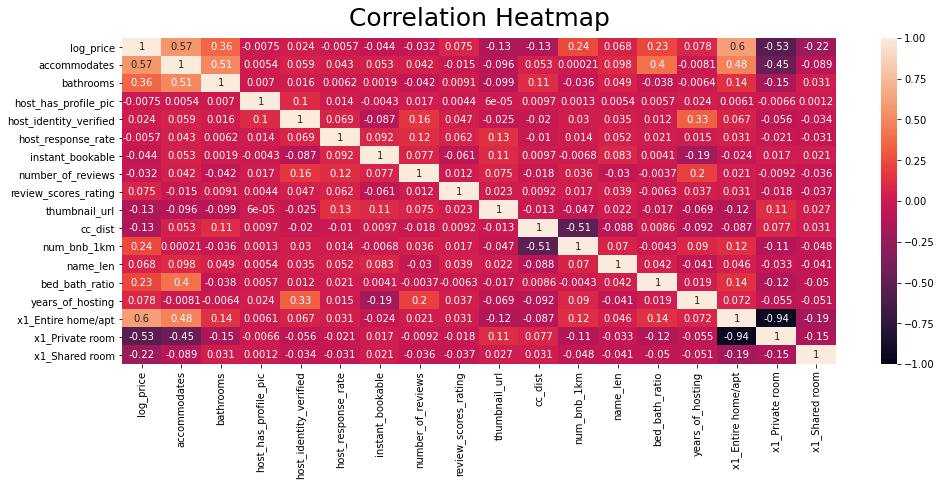

In [161]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(us_cor.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=12)

In [143]:
data = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/raw/train.csv')

In [144]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


Text(0.5, 1.0, 'Airbnb Price by City')

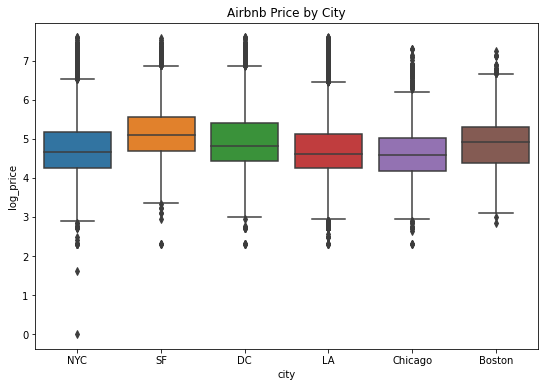

In [150]:
plt.figure(figsize=(9, 6))
fig = sns.boxplot(x=data.city, y=data.log_price)
plt.title('Airbnb Price by City')
